In [12]:
import math

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline

data = [16, 94, 63, 267, 11, 250, 57, 39, 84, 16, 15, 77, 164, 106, 36,
        12, 116, 91, 48, 56, 74, 6, 8, 14, 32, 20, 23, 121, 34, 6, 156,
        27, 29, 3, 64, 45, 50, 22, 204, 60, 44, 28, 29, 206, 95, 74, 89,
        54, 85, 23, 129, 16, 120, 75, 17, 16, 57, 49, 14, 137]
variation_range = {}
for i in data:
    if i in variation_range:
        variation_range[i] += 1
    else:
        variation_range[i] = 1
sorted_variation_range = sorted(variation_range)
print("val\tfreq\trel_freq")
for i in sorted_variation_range:
    print(f'{i}\t{variation_range[i]}\t{round(variation_range[i] / len(data), 2)}')

val	freq	rel_freq
3	1	0.02
6	2	0.03
8	1	0.02
11	1	0.02
12	1	0.02
14	2	0.03
15	1	0.02
16	4	0.07
17	1	0.02
20	1	0.02
22	1	0.02
23	2	0.03
27	1	0.02
28	1	0.02
29	2	0.03
32	1	0.02
34	1	0.02
36	1	0.02
39	1	0.02
44	1	0.02
45	1	0.02
48	1	0.02
49	1	0.02
50	1	0.02
54	1	0.02
56	1	0.02
57	2	0.03
60	1	0.02
63	1	0.02
64	1	0.02
74	2	0.03
75	1	0.02
77	1	0.02
84	1	0.02
85	1	0.02
89	1	0.02
91	1	0.02
94	1	0.02
95	1	0.02
106	1	0.02
116	1	0.02
120	1	0.02
121	1	0.02
129	1	0.02
137	1	0.02
156	1	0.02
164	1	0.02
204	1	0.02
206	1	0.02
250	1	0.02
267	1	0.02


In [13]:
M = round(1 + math.log2(len(data)))
min_val = min(data)
max_val = max(data)
h = (max_val - min_val) / M
class_borders = {(min_val + h * i, min_val + h * (i + 1)): None for i in range(M)}
for border in class_borders:
    class_borders[border] = len([i for i in data if i < border[1] and i >= border[0]])
print("border\t\tfreq\trel_freq")
plot_values = []
sorted_borders = sorted(class_borders, key=lambda x: x[0])
for border in sorted_borders:
    plot_values.append((class_borders[border], class_borders[border] / len(data)))
    print(
        f"[{round(border[0], 1)}; {round(border[1], 1)})\t"
        f"{plot_values[-1][0]}\t{round(plot_values[-1][1], 2)}"
    )

border		freq	rel_freq
[3.0; 40.7)	26	0.43
[40.7; 78.4)	16	0.27
[78.4; 116.1)	8	0.13
[116.1; 153.9)	4	0.07
[153.9; 191.6)	2	0.03
[191.6; 229.3)	2	0.03
[229.3; 267.0)	1	0.02


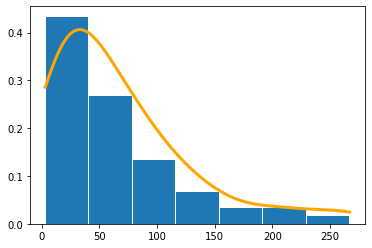

In [14]:
plt.bar([(i[0] + i[1]) / 2 for i in sorted_borders], [i[1] for i in plot_values], width=h-1)
def avg(data: list):
    return sum(data) / len(data)

mean = avg(data)
dispersion = sum((i - mean) ** 2 for i in data) / (len(data) - 1)
standard_deviation = dispersion ** 0.5
displaced_dispersion = sum((i - mean) ** 2 for i in data) / len(data)
displaced_standard_deviation = displaced_dispersion ** 0.5

def epanechnikov_kernel_function(u: float):
    return (3 / (4 * (5 ** 0.5))) * (1 - ((u ** 2) / 5)) * int((u ** 2) ** 0.5 <= (5 ** 0.5))
def gauss_kernel_function(u: float):
    return (1 / ((2 * math.pi) ** 0.5)) * math.exp(-(u ** 2) / 2)
def KDE(x, K, b):
    return sum(K((x - i) / b) for i in data) / (len(data) * b)

b_window = displaced_standard_deviation * (len(data) ** (-1/5))  # Scott
# b_window = displaced_standard_deviation * (((3 * len(data)) / 4) ** (-1/5))  # Silverman
x_grid = np.linspace(min_val, max_val, 150)
y_grid = [KDE(i, gauss_kernel_function, b_window) * 50 for i in x_grid]
plt.plot(x_grid, y_grid, color="orange", linewidth=3)

In [15]:
sorted_data = sorted(data)
N = len(data)
median = avg(sorted_data[(len(data) // 2) - (not bool(len(data) % 2)) : (len(data) // 2) + 1])
variation = standard_deviation / mean
displaced_skewness = sum(((i - mean) ** 3) for i in data) /\
    (len(data) * (displaced_standard_deviation ** 3))
skewness = ((N * (N - 1)) / (N - 2)) * displaced_skewness
displaced_kurtosis = sum(((i - mean) ** 4) for i in data) /\
    (len(data) * (displaced_standard_deviation ** 4)) - 3
displaced_antikurtosis = (displaced_kurtosis + 3) ** -0.5
kurtosis = (((N ** 2) - 1) / ((N - 2) * (N - 3))) * (displaced_kurtosis + 6 / (N + 1))

print("Count =", N)
print("Mean =", mean)
print("Median =", median)
print("Dispersion =", dispersion)
print("Standard_deviation =", standard_deviation)
print("Displaced dispersion =", displaced_dispersion)
print("Displaced standard deviation =", displaced_standard_deviation)
print("Coefficient of variation =", variation)
print("Displaced coefficient of skewness =", displaced_skewness)
print("Coefficient of skewness =", skewness)
print("Displaced coefficient of kurtosis =", displaced_kurtosis)
print("Coefficient of kurtosis =", kurtosis)
print("Displaced coefficient of antikurtosis =", displaced_antikurtosis)


Count = 60
Mean = 66.21666666666667
Median = 49.5
Dispersion = 3624.4437853107343
Standard_deviation = 60.203353605183274
Displaced dispersion = 3564.0363888888887
Displaced standard deviation = 59.699550994030844
Coefficient of variation = 0.909187318477472
Displaced coefficient of skewness = 1.5287605638219866
Coefficient of skewness = 93.30711027465229
Displaced coefficient of kurtosis = 2.09947667036515
Coefficient of kurtosis = 2.39262448174355
Displaced coefficient of antikurtosis = 0.44283016356349697


In [16]:
t_distribution_quantile = 2

def get_confidence_interval(characteristic, std_deviation) -> tuple:
    return characteristic - t_distribution_quantile * std_deviation,\
        characteristic + t_distribution_quantile * std_deviation

std_dev_of_mean = standard_deviation / (N ** 0.5)
std_dev_of_std_dev = standard_deviation / ((2 * len(data)) ** 0.5)
std_dev_of_variation = variation * (((1 + 2 * (variation ** 2)) / (2 * N)) ** 0.5)
std_dev_of_displaced_skewness = ((6 * (N - 2)) / ((N + 1) * (N + 3))) ** 0.5
std_dev_of_skewness = ((6 * N * (N - 1)) / ((N - 2) * (N + 1) * (N + 3))) ** 0.5
std_dev_of_displaced_kurtosis = (((24 * N) * (N - 2) * (N - 3)) /\
                                 (((N + 1) ** 2) * (N + 3) * (N + 5))) ** 0.5
std_dev_of_kurtosis = (((24 * N) * ((N - 1) ** 2)) /\
                       ((N - 3) * (N - 2) * (N + 3) * (N + 5))) ** 0.5

mean_interval = get_confidence_interval(mean, std_dev_of_mean)
std_dev_interval = get_confidence_interval(
    standard_deviation, std_dev_of_std_dev
)
variation_interval = get_confidence_interval(variation, std_dev_of_variation)
displaced_skewness_interval = get_confidence_interval(
    displaced_skewness, std_dev_of_displaced_skewness
)
skewness_interval = get_confidence_interval(skewness, std_dev_of_skewness)
displaced_kurtosis_interval = get_confidence_interval(
    displaced_kurtosis, std_dev_of_displaced_kurtosis
)
kurtosis_interval = get_confidence_interval(kurtosis, std_dev_of_kurtosis)

print("Standard deviation of mean =", std_dev_of_mean)
print("Standard deviation of standard deviation =", std_dev_of_std_dev)
print("Standard deviation of variation =", std_dev_of_variation)
print("Standard deviation of displaced skewness =", std_dev_of_displaced_skewness)
print("Standard deviation of skewness =", std_dev_of_skewness)
print("Standard deviation of displaced kurtosis =", std_dev_of_displaced_kurtosis)
print("Standard deviation of kurtosis =", std_dev_of_kurtosis)
print()
print(f"Mean confidence interval = [{mean_interval[0]}; {mean_interval[1]}]")
print(f"Standard deviation confidence interval = [{std_dev_interval[0]}; {std_dev_interval[1]}]")
print(f"Variation confidence interval = [{variation_interval[0]}; {variation_interval[1]}]")
print(f"Displaced skewness confidence interval = [{displaced_skewness_interval[0]};"
      f" {displaced_skewness_interval[1]}]")
print(f"Skewness confidence interval = [{skewness_interval[0]}; {skewness_interval[1]}]")
print(f"Displaced kurtosis confidence interval = [{displaced_kurtosis_interval[0]};"
      f" {displaced_kurtosis_interval[1]}]")
print(f"Kurtosis confidence interval = [{kurtosis_interval[0]}; {kurtosis_interval[1]}]")

Standard deviation of mean = 7.772219529957035
Standard deviation of standard deviation = 5.49578913450314
Standard deviation of variation = 0.1351920872126341
Standard deviation of displaced skewness = 0.30092233963047793
Standard deviation of skewness = 0.3086939139148819
Standard deviation of displaced kurtosis = 0.5589537608654785
Standard deviation of kurtosis = 0.6084920100891885

Mean confidence interval = [50.6722276067526; 81.76110572658074]
Standard deviation confidence interval = [49.21177533617699; 71.19493187418955]
Variation confidence interval = [0.6388031440522038; 1.17957149290274]
Displaced skewness confidence interval = [0.9269158845610307; 2.1306052430829423]
Skewness confidence interval = [92.68972244682253; 93.92449810248205]
Displaced kurtosis confidence interval = [0.9815691486341931; 3.217384192096107]
Kurtosis confidence interval = [1.175640461565173; 3.609608501921927]


In [33]:
def empirical_distribution_function(index: int, var_range: dict, sorted_var_range: list):
    return round(sum(var_range[i] / len(data) for i in sorted_var_range[:index + 1]), 12)

distribution_function_values = [
    empirical_distribution_function(i, variation_range, sorted_variation_range) for i in range(len(variation_range))
]

print(distribution_function_values)

[0.016666666667, 0.05, 0.066666666667, 0.083333333333, 0.1, 0.133333333333, 0.15, 0.216666666667, 0.233333333333, 0.25, 0.266666666667, 0.3, 0.316666666667, 0.333333333333, 0.366666666667, 0.383333333333, 0.4, 0.416666666667, 0.433333333333, 0.45, 0.466666666667, 0.483333333333, 0.5, 0.516666666667, 0.533333333333, 0.55, 0.583333333333, 0.6, 0.616666666667, 0.633333333333, 0.666666666667, 0.683333333333, 0.7, 0.716666666667, 0.733333333333, 0.75, 0.766666666667, 0.783333333333, 0.8, 0.816666666667, 0.833333333333, 0.85, 0.866666666667, 0.883333333333, 0.9, 0.916666666667, 0.933333333333, 0.95, 0.966666666667, 0.983333333333, 1.0]


In [27]:
u_table = {
    0.0014: 0.232, 0.0015: 0.174, 0.0016: 0.116, 0.0017: 0.087, 0.0018: 0.029, 0.0019: 0.252,
    0.002: 0.224, 0.0021: 0.168,0.0022: 0.14, 0.0023: 0.084, 0.0024: 0.056, 0.0025: 0.028,
    0.0026: 0.243, 0.0027: 0.216, 0.0028: 0.189, 0.0029: 0.162, 0.003: 0.135, 0.0031: 0.108,
    0.0032: 0.081, 0.0033: 0.054, 0.0034: 0.027, 0.0035: 0.0, 0.0036: 0.234, 0.0037: 0.208,
    0.0038: 0.182, 0.0039: 0.156, 0.004: 0.13, 0.0041: 0.104, 0.0043: 0.078, 0.0044: 0.052,
    0.0045: 0.026, 0.0047: 0.0, 0.0048: 0.225, 0.0049: 0.2, 0.0051: 0.175, 0.0052: 0.15,
    0.0054: 0.125, 0.0055: 0.1, 0.0057: 0.075, 0.0059: 0.05, 0.006: 0.025, 0.0062: 0.0,
    0.0064: 0.216, 0.0066: 0.192, 0.0068: 0.168, 0.0069: 0.144, 0.0071: 0.12, 0.0073: 0.096,
    0.0075: 0.072, 0.0078: 0.048, 0.008: 0.024, 0.0082: 0.0, 0.0084: 0.207, 0.0087: 0.184,
    0.0089: 0.161, 0.0091: 0.138, 0.0094: 0.115, 0.0096: 0.092, 0.0099: 0.069, 0.0102: 0.046,
    0.0104: 0.023, 0.0107: 0.0, 0.011: 0.198, 0.0113: 0.176, 0.0116: 0.154, 0.0119: 0.132,
    0.0122: 0.11, 0.0125: 0.088, 0.0129: 0.066, 0.0132: 0.044, 0.0136: 0.022, 0.0139: 0.0,
    0.0143: 0.189, 0.0146: 0.168, 0.015: 0.147, 0.0154: 0.126, 0.0158: 0.105, 0.0162: 0.084,
    0.0166: 0.063, 0.017: 0.042, 0.0174: 0.021, 0.0179: 0.0, 0.0183: 0.18, 0.0188: 0.16,
    0.0192: 0.14, 0.0197: 0.12, 0.0202: 0.1, 0.0207: 0.08, 0.0212: 0.06, 0.0217: 0.04,
    0.0222: 0.02, 0.0228: 0.0, 0.0233: 0.171, 0.0239: 0.152, 0.0244: 0.133, 0.025: 0.114,
    0.0256: 0.095, 0.0262: 0.076, 0.0268: 0.057, 0.0274: 0.038, 0.0281: 0.019, 0.0287: 0.0,
    0.0294: 0.162, 0.0301: 0.144, 0.0307: 0.126, 0.0314: 0.108, 0.0322: 0.09, 0.0329: 0.072,
    0.0336: 0.054, 0.0344: 0.036, 0.0351: 0.018, 0.0359: 0.0, 0.0367: 0.153, 0.0375: 0.136,
    0.0384: 0.119, 0.0392: 0.102, 0.0401: 0.085, 0.0409: 0.068, 0.0418: 0.051, 0.0427: 0.034,
    0.0436: 0.017, 0.0446: 0.0, 0.0455: 0.144, 0.0465: 0.128, 0.0475: 0.112, 0.0485: 0.096,
    0.0495: 0.08, 0.0505: 0.064, 0.0516: 0.048, 0.0526: 0.032, 0.0537: 0.016, 0.0548: 0.0,
    0.0559: 0.135, 0.0571: 0.12, 0.0582: 0.105, 0.0594: 0.09, 0.0606: 0.075, 0.0618: 0.06,
    0.063: 0.045, 0.0643: 0.03, 0.0655: 0.015, 0.0668: 0.0, 0.0681: 0.126, 0.0694: 0.112,
    0.0708: 0.098, 0.0721: 0.084, 0.0735: 0.07, 0.0749: 0.056, 0.0764: 0.042, 0.0778: 0.028,
    0.0793: 0.014, 0.0808: 0.0, 0.0823: 0.117, 0.0838: 0.104, 0.0853: 0.091, 0.0869: 0.078,
    0.0885: 0.065, 0.0901: 0.052, 0.0918: 0.039, 0.0934: 0.026, 0.0951: 0.013, 0.0968: 0.0,
    0.0985: 0.108, 0.1003: 0.096, 0.102: 0.084, 0.1038: 0.072, 0.1056: 0.06, 0.1075: 0.048,
    0.1093: 0.036, 0.1112: 0.024, 0.1131: 0.012, 0.1151: 0.0, 0.117: 0.099, 0.119: 0.088,
    0.121: 0.077, 0.123: 0.066, 0.1251: 0.055, 0.1271: 0.044, 0.1292: 0.033, 0.1314: 0.022,
    0.1335: 0.011, 0.1357: 0.0, 0.1379: 0.09, 0.1401: 0.08, 0.1423: 0.07, 0.1446: 0.06,
    0.1469: 0.05, 0.1492: 0.04, 0.1515: 0.03, 0.1539: 0.02, 0.1562: 0.01, 0.1587: 0.0,
    0.1611: 0.081, 0.1635: 0.072, 0.166: 0.063, 0.1685: 0.054, 0.1711: 0.045, 0.1736: 0.036,
    0.1762: 0.027, 0.1788: 0.018, 0.1814: 0.009, 0.1841: 0.0, 0.1867: 0.072, 0.1894: 0.064,
    0.1922: 0.056, 0.1949: 0.048, 0.1977: 0.04, 0.2005: 0.032, 0.2033: 0.024, 0.2061: 0.016,
    0.209: 0.008, 0.2119: 0.0, 0.2148: 0.063, 0.2177: 0.056, 0.2206: 0.049, 0.2236: 0.042,
    0.2266: 0.035, 0.2296: 0.028, 0.2327: 0.021, 0.2358: 0.014, 0.2389: 0.007, 0.242: 0.0,
    0.2451: 0.054, 0.2483: 0.048, 0.2514: 0.042, 0.2546: 0.036, 0.2578: 0.03, 0.2611: 0.024,
    0.2643: 0.018, 0.2676: 0.012, 0.2709: 0.006, 0.2743: 0.0, 0.2776: 0.045, 0.281: 0.04,
    0.2843: 0.035, 0.2877: 0.03, 0.2912: 0.025, 0.2946: 0.02, 0.2981: 0.015, 0.3015: 0.01,
    0.305: 0.005, 0.3085: 0.0, 0.3121: 0.036, 0.3156: 0.032, 0.3192: 0.028, 0.3228: 0.024,
    0.3264: 0.02, 0.33: 0.016, 0.3336: 0.012, 0.3372: 0.008, 0.3409: 0.004, 0.3446: 0.0,
    0.3483: 0.027, 0.352: 0.024, 0.3557: 0.021, 0.3594: 0.018, 0.3632: 0.015, 0.3669: 0.012,
    0.3707: 0.009, 0.3745: 0.006, 0.3783: 0.003, 0.3821: 0.0, 0.3859: 0.018, 0.3897: 0.016,
    0.3936: 0.014, 0.3974: 0.012, 0.4013: 0.01, 0.4052: 0.008, 0.409: 0.006, 0.4129: 0.004,
    0.4168: 0.002, 0.4207: 0.0, 0.4247: 0.009, 0.4286: 0.008, 0.4325: 0.007, 0.4364: 0.006,
    0.4404: 0.005, 0.4443: 0.004, 0.4483: 0.003, 0.4522: 0.002, 0.4562: 0.001, 0.4602: 0.0,
    0.4641: 0.0, 0.4681: 0.0, 0.4721: 0.0, 0.4761: 0.0, 0.4801: 0.0, 0.484: 0.0, 0.488: 0.0,
    0.492: 0.0, 0.496: 0.0, 0.5: 0.0,
    0.504: 0.01, 0.508: 0.02, 0.512: 0.03, 0.516: 0.04, 0.5199: 0.05, 0.5239: 0.06, 0.5279: 0.07,
    0.5319: 0.08, 0.5359: 0.09, 0.5398: 0.1, 0.5438: 0.11, 0.5478: 0.12, 0.5517: 0.13, 0.5557: 0.14,
    0.5596: 0.15, 0.5636: 0.16, 0.5675: 0.17, 0.5714: 0.18, 0.5753: 0.19, 0.5793: 0.2, 0.5832: 0.21,
    0.5871: 0.22, 0.591: 0.23, 0.5948: 0.24, 0.5987: 0.25, 0.6026: 0.26, 0.6064: 0.27, 0.6103: 0.28,
    0.6141: 0.29, 0.6179: 0.3, 0.6217: 0.31, 0.6255: 0.32, 0.6293: 0.33, 0.6331: 0.34, 0.6368: 0.35,
    0.6406: 0.36, 0.6443: 0.37, 0.648: 0.38, 0.6517: 0.39, 0.6554: 0.4, 0.6591: 0.41, 0.6628: 0.42,
    0.6664: 0.43, 0.67: 0.44, 0.6736: 0.45, 0.6772: 0.46, 0.6808: 0.47, 0.6844: 0.48, 0.6879: 0.49,
    0.6915: 0.5, 0.695: 0.51, 0.6985: 0.52, 0.7019: 0.53, 0.7054: 0.54, 0.7088: 0.55, 0.7123: 0.56,
    0.7157: 0.57, 0.719: 0.58, 0.7224: 0.59, 0.7257: 0.6, 0.7291: 0.61, 0.7324: 0.62, 0.7357: 0.63,
    0.7389: 0.64, 0.7422: 0.65, 0.7454: 0.66, 0.7486: 0.67, 0.7517: 0.68, 0.7549: 0.69, 0.758: 0.7,
    0.7611: 0.71, 0.7642: 0.72, 0.7673: 0.73, 0.7704: 0.74, 0.7734: 0.75, 0.7764: 0.76, 0.7794: 0.77,
    0.7823: 0.78, 0.7852: 0.79, 0.7881: 0.8, 0.791: 0.81, 0.7939: 0.82, 0.7967: 0.83, 0.7995: 0.84,
    0.8023: 0.85, 0.8051: 0.86, 0.8078: 0.87, 0.8106: 0.88, 0.8133: 0.89, 0.8159: 0.9, 0.8186: 0.91,
    0.8212: 0.92, 0.8238: 0.93, 0.8264: 0.94, 0.8289: 0.95, 0.8315: 0.96, 0.834: 0.97, 0.8365: 0.98,
    0.8389: 0.99, 0.8413: 1.0, 0.8438: 1.01, 0.8461: 1.02, 0.8485: 1.03, 0.8508: 1.04, 0.8531: 1.05,
    0.8554: 1.06, 0.8577: 1.07, 0.8599: 1.08, 0.8621: 1.09, 0.8643: 1.1, 0.8665: 1.11, 0.8686: 1.12,
    0.8708: 1.13, 0.8729: 1.14, 0.8749: 1.15, 0.877: 1.16, 0.879: 1.17, 0.881: 1.18, 0.883: 1.19,
    0.8849: 1.2, 0.8869: 1.21, 0.8888: 1.22, 0.8907: 1.23, 0.8925: 1.24, 0.8944: 1.25, 0.8962: 1.26,
    0.898: 1.27, 0.8997: 1.28, 0.9015: 1.29, 0.9032: 1.3, 0.9049: 1.31, 0.9066: 1.32, 0.9082: 1.33,
    0.9099: 1.34, 0.9115: 1.35, 0.9131: 1.36, 0.9147: 1.37, 0.9162: 1.38, 0.9177: 1.39, 0.9192: 1.4,
    0.9207: 1.41, 0.9222: 1.42, 0.9236: 1.43, 0.9251: 1.44, 0.9265: 1.45, 0.9279: 1.46, 0.9292: 1.47,
    0.9306: 1.48, 0.9319: 1.49, 0.9332: 1.5, 0.9345: 1.51, 0.9357: 1.52, 0.937: 1.53, 0.9382: 1.54,
    0.9394: 1.55, 0.9406: 1.56, 0.9418: 1.57, 0.9429: 1.58, 0.9441: 1.59, 0.9452: 1.6, 0.9463: 1.61,
    0.9474: 1.62, 0.9484: 1.63, 0.9495: 1.64, 0.9505: 1.65, 0.9515: 1.66, 0.9525: 1.67, 0.9535: 1.68,
    0.9545: 1.69, 0.9554: 1.7, 0.9564: 1.71, 0.9573: 1.72, 0.9582: 1.73, 0.9591: 1.74, 0.9599: 1.75,
    0.9608: 1.76, 0.9616: 1.77, 0.9625: 1.78, 0.9633: 1.79, 0.9641: 1.8, 0.9649: 1.81, 0.9656: 1.82,
    0.9664: 1.83, 0.9671: 1.84, 0.9678: 1.85, 0.9686: 1.86, 0.9693: 1.87, 0.9699: 1.88, 0.9706: 1.89,
    0.9713: 1.9, 0.9719: 1.91, 0.9726: 1.92, 0.9732: 1.93, 0.9738: 1.94, 0.9744: 1.95, 0.975: 1.96,
    0.9756: 1.97, 0.9761: 1.98, 0.9767: 1.99, 0.9772: 2.0, 0.9778: 2.01, 0.9783: 2.02, 0.9788: 2.03,
    0.9793: 2.04, 0.9798: 2.05, 0.9803: 2.06, 0.9808: 2.07, 0.9812: 2.08, 0.9817: 2.09, 0.9821: 2.1,
    0.9826: 2.11, 0.983: 2.12, 0.9834: 2.13, 0.9838: 2.14, 0.9842: 2.15, 0.9846: 2.16, 0.985: 2.17,
    0.9854: 2.18, 0.9857: 2.19, 0.9861: 2.2, 0.9864: 2.21, 0.9868: 2.22, 0.9871: 2.23, 0.9875: 2.24,
    0.9878: 2.25, 0.9881: 2.26, 0.9884: 2.27, 0.9887: 2.28, 0.989: 2.29, 0.9893: 2.3, 0.9896: 2.31,
    0.9898: 2.32, 0.9901: 2.33, 0.9904: 2.34, 0.9906: 2.35, 0.9909: 2.36, 0.9911: 2.37, 0.9913: 2.38,
    0.9916: 2.39, 0.9918: 2.4, 0.992: 2.41, 0.9922: 2.42, 0.9925: 2.43, 0.9927: 2.44, 0.9929: 2.45,
    0.9931: 2.46, 0.9932: 2.47, 0.9934: 2.48, 0.9936: 2.49, 0.9938: 2.5, 0.994: 2.51, 0.9941: 2.52,
    0.9943: 2.53, 0.9945: 2.54, 0.9946: 2.55, 0.9948: 2.56, 0.9949: 2.57, 0.9951: 2.58, 0.9952: 2.59,
    0.9953: 2.6, 0.9955: 2.61, 0.9956: 2.62, 0.9957: 2.63, 0.9959: 2.64, 0.996: 2.65, 0.9961: 2.66,
    0.9962: 2.67, 0.9963: 2.68, 0.9964: 2.69, 0.9965: 2.7, 0.9966: 2.71, 0.9967: 2.72, 0.9968: 2.73,
    0.9969: 2.74, 0.997: 2.75, 0.9971: 2.76, 0.9972: 2.77, 0.9973: 2.78, 0.9974: 2.8, 0.9975: 2.81,
    0.9976: 2.82, 0.9977: 2.84, 0.9978: 2.85, 0.9979: 2.87, 0.998: 2.88, 0.9981: 2.9, 0.9982: 2.92,
    0.9983: 2.93, 0.9984: 2.95, 0.9985: 2.97, 0.9986: 2.99, 0.9987: 3.02, 0.9988: 3.04, 0.9989: 3.07,
    0.999: 3.1, 0.9991: 3.13, 0.9992: 3.17, 0.9993: 3.21, 0.9994: 3.26, 0.9995: 3.32, 0.9996: 3.38,
    0.9997: 3.48, 0.9998: 3.49
}


In [32]:
def get_quantile_values(distribution_function_values: list) -> list:
    quantile_values = []
    for i in distribution_function_values:
        min_distance = 1
        chosen_value = None
        for j in u_table:
            distance = ((j - i) ** 2)
            if distance < min_distance:
                chosen_value = u_table[j]
                min_distance = distance
        quantile_values.append(chosen_value)
    return quantile_values
quantile_values = get_quantile_values(distribution_function_values)
print(quantile_values)

[0.063, 0.08, 0.0, 0.104, 0.096, 0.011, 0.04, 0.056, 0.021, 0.042, 0.012, 0.01, 0.032, 0.012, 0.012, 0.0, 0.01, 0.002, 0.007, 0.003, 0.0, 0.0, 0.0, 0.04, 0.08, 0.13, 0.21, 0.25, 0.3, 0.34, 0.43, 0.48, 0.52, 0.57, 0.62, 0.67, 0.73, 0.78, 0.84, 0.9, 0.97, 1.04, 1.11, 1.19, 1.28, 1.38, 1.5, 1.64, 1.83, 2.13, 3.49]


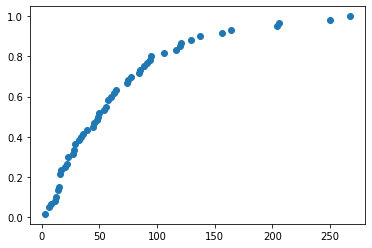

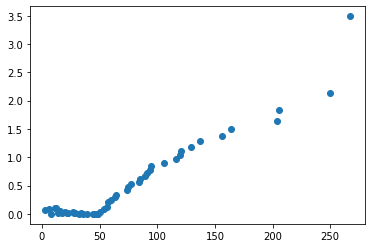

In [35]:
plt.scatter(sorted_variation_range, distribution_function_values)
plt.figure()
plt.scatter(sorted_variation_range, quantile_values)

In [38]:
def exponential_distribution_function(index: int, var_range: dict, sorted_var_range: list):
    return round(sum(var_range[i] / len(data) for i in sorted_var_range[:index + 1]), 12)

# exp_distribution_function_values = [-1 * (1-i).ln() for i in distribution_function_values]
# exp_quantile_values = get_quantile_values(exp_distribution_function_values)
# plt.scatter(sorted_variation_range, exp_distribution_function_values)
# plt.figure()
# plt.scatter(sorted_variation_range, exp_quantile_values)

AttributeError: 'float' object has no attribute 'ln'